# De-reberberación

En este cuaderno de iPython nos propusimos resolver un ejericio tomado del libro de Proakis-Manolakis sobre reberveración [1]:
![](img/echoCancellation3.png)
![](img/echoCancellation4.png)

## Ejercicio (a)

La transformada inversa Z de la respuesta al impulso $H(z)=Y(z)/X(z)$ del ejercicio (a) es la siguiente:

$$
y[n] = x[n] - \alpha y[n-D],
$$

con $0<\alpha=0.7$ y $D=5$ se obtiene la siguiente respuesta al impulso con un soporte de 50 puntos:

Populating the interactive namespace from numpy and matplotlib


<StemContainer object of 3 artists>

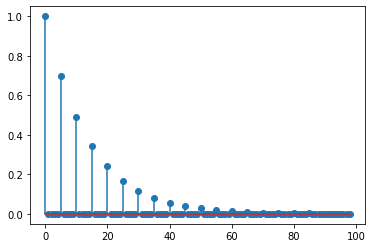

In [2]:
%pylab inline
import numpy as np

def peine(x, alpha, D):
    N = len(x)
    y = np.zeros(N)
    for n in range(0,N):
        y[n] = x[n] - alpha*(0 if n-D<0 else y[n-D])
    return y
        
kronecker = np.zeros(99)
kronecker[0] = 1
    
pylab.stem(np.abs(peine(kronecker, alpha=0.7, D=5)), use_line_collection=True)

Se observa que, en efecto, la respuesta al impulso del filtro peine es una función que decae exponencialmente, como lo haría una reberveración. Incluso podríamos procesar una grabación y escuchar el efecto agregado:

In [3]:
from scipy.io import wavfile
from IPython.display import Audio

fs_cave, x_cave = wavfile.read('./wav/Cave_Johnson_fifties_intro01.wav')
y = peine(x_cave, alpha=0.5, D=10000)
Audio(y, rate=fs_cave) 

Suena como una reberveración, lo que comprueba que el filtro peine es adecuado para esta tarea.

## Ejercicio (b)

Procedemos ahora a calcular la respuesta al impulso del filtro peine pasa-todas, cuya respuesta al impulso es la siguiente:

$$
y[n] = -\alpha x[n] + x[n-D] + \alpha y[n-D],
$$

y reutilizando los parámetros $\alpha$ y $D$ se vería como sigue:

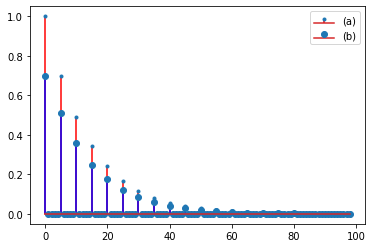

In [87]:
def peinePasaTodas(x, alpha, D):
    N = len(x)
    y = np.zeros(N)
    for n in range(0,N):
        y[n] = -alpha*x[n] + (0 if n-D<0 else x[n-D]) + alpha*(0 if n-D<0 else y[n-D])
    return y
        
pylab.stem(np.abs(peine(kronecker, alpha=0.7, D=5)), linefmt='red', markerfmt='.', use_line_collection=True, label='(a)')
pylab.stem(np.abs(peinePasaTodas(kronecker,alpha=0.7,D=5)), linefmt='blue', use_line_collection=True, label='(b)')
pylab.legend()

Es idéntico a la respuesta al impulso del ejercicio (a), pero el desplazado una unidad a la izquierda. Ahora colocamos los filtros en cascada y volvemos a procesar la respuesta al impulso usando los parámetros de la unidad 1:

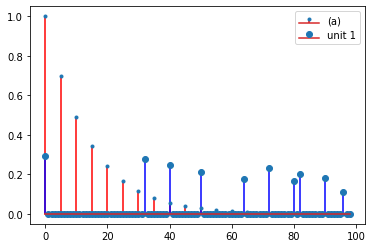

In [92]:
def cascada(x, alphas, Ds):
    y = x
    for i in range(0,len(alphas)):
        y = peinePasaTodas(y,alphas[i],Ds[i])
    return y

pylab.stem(np.abs(peine(kronecker, alpha=0.7, D=5)), linefmt='red', markerfmt='.', use_line_collection=True, label='(a)')
pylab.stem(np.abs(cascada(kronecker, [0.7,0.665,0.63175], [50,40,32])), linefmt='blue', use_line_collection=True, label='unit 1')
pylab.legend()

Se observa que la forma exponencial decayente se ha perdido. ¿Cómo se escuchará?

In [95]:
y = cascada(x_cave, [0.7,0.665,0.63175], np.multiply(1000, [50,40,32])) # escalamos los retrasos para escucharlos
Audio(y, rate=fs_cave) 

Completamente un desorden de repeticiones, a los pocos segundos el audio se vuelve incomprensible. Ahora probemos usando los parámetros de la unidad 2:

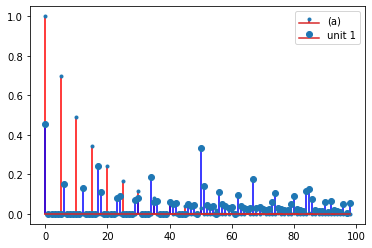

In [96]:
pylab.stem(np.abs(peine(kronecker, alpha=0.7, D=5)), linefmt='red', markerfmt='.', use_line_collection=True, label='(a)')
pylab.stem(np.abs(cascada(kronecker, [0.7,0.77,0.847], [50,17,6])), linefmt='blue', use_line_collection=True, label='unit 1')
pylab.legend()

De nuevo, nos entra la curiosidad de saber cómo se escuchará.

In [97]:
y = cascada(x_cave, [0.7,0.77,0.847], np.multiply(1000, [50,17,6])) # escalamos los retrasos para escucharlos
Audio(y, rate=fs_cave) 

A pesar de que el audio no tiene la misma calidad que es del ejercicio (a), el audio anterior se comprende casi hasta el final.

## Ejercicio (c)

En este punto, podemos responder la pregunta del ejercicio (c). La unidad 1 es un mejor reberverador porque con él no hay repeticiones claras de la señal. Esto se ver reflejado en la respuesta al impulso, porque con un reberberador, la amplitud de los retrasos va decayendo: $g_k>g_{k+1}>0$.

In [113]:
print(np.divide([0.7,0.665,0.63175],[0.665,0.63175,1])) # unidad 1
print(np.divide([0.7,0.77,0.847], [0.77,0.847,1])) # unidad 2

[1.05263158 1.05263158 0.63175   ]
[0.90909091 0.90909091 0.847     ]


El mínimo común divisor es 1 para la unidad 2.

## References

1. J. Proakis, D. Manolakis. Digital Signal Processing: Principles, Algorithms and Applications, 3rd Edition. Peason.